# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

> Helpful tutorial: https://coaxlab.github.io/Data-Explorations/notebooks/selecting-the-best-model.html

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [8]:
#load necessary packages
#install.packages("leaps")
library(leaps)
library(tidyverse)
library(ggplot2)

In [9]:
set.seed(73)

X   <-  rnorm(100) # Of the predictor X
eps <-  rnorm(100)
sample_size = 100

beta_n = 5 #my birth month
beta_1 = 7 #EG's birthmonth
beta_2 = 35 #n*1
beta_3 = 12 #n+1

Y = beta_n + beta_1*X + beta_2*(X^2) + beta_3*(X^3) + eps

df <- data.frame(Y, X)
head(df)



,Y,X
,<dbl>,<dbl>
1,5.120564,-0.1450469
2,10.305126,0.2913580
3,6.297996,0.0937974
4,4.328160,-0.1273679
5,15.998228,-0.8468310
6,7.418131,0.1411659


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [10]:
#loop for the X^i data
for (i in 2:10) {
  df[paste0("X",i)] <- df$X^i 
}
head(df)

library(leaps)
regfit.full <- regsubsets(Y ~ ., df, nvmax=10)
reg.summary <- summary(regfit.full)
reg.summary


,Y,X,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.120564,-0.1450469,0.021038606,-0.0030515848,4.426229e-04,-6.420109e-05,9.312170e-06,-1.350701e-06,1.959151e-07,-2.841687e-08,4.121780e-09
2,10.305126,0.2913580,0.084889487,0.0247332316,7.206225e-03,2.099591e-03,6.117327e-04,1.782332e-04,5.192968e-05,1.513013e-05,4.408284e-06
3,6.297996,0.0937974,0.008797953,0.0008252252,7.740398e-05,7.260292e-06,6.809966e-07,6.387571e-08,5.991376e-09,5.619755e-10,5.271184e-11
4,4.328160,-0.1273679,0.016222579,-0.0020662356,2.631721e-04,-3.351967e-05,4.269330e-06,-5.437755e-07,6.925954e-08,-8.821441e-09,1.123568e-09
5,15.998228,-0.8468310,0.717122826,-0.6072818754,5.142651e-01,-4.354957e-01,3.687913e-01,-3.123039e-01,2.644686e-01,-2.239603e-01,1.896565e-01
6,7.418131,0.1411659,0.019927799,0.0028131249,3.971172e-04,5.605939e-05,7.913672e-06,1.117140e-06,1.577021e-07,2.226215e-08,3.142655e-09


Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " " " " " "*" " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " "*" " " " " " " " " " "
5  ( 1 )  "*" "*" "*" " " " " " " "*" " " " " "*"
6  ( 1 )  "*" "*" "*" " " "*" " " "*" " " "*" " "
7  ( 1 )  "*" "*" "*" " " "*" " " "*" "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

'"# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
"'Otherwise you can either delete this cell or leave it blank.

```
# Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " " " " " "*" " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " "*" " " " " " " " " " "
5  ( 1 )  "*" "*" "*" " " " " " " "*" " " " " "*"
6  ( 1 )  "*" "*" "*" " " "*" " " "*" " " "*" " "
7  ( 1 )  "*" "*" "*" " " "*" " " "*" "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

[1] 8.175201


[1] 8

(Intercept)           X          X2          X3          X4          X5 
 4.81059699  6.26349140 35.89669812 13.83647702 -0.99689792 -0.94186226 
         X6          X7          X8 
 0.38613783  0.12933083 -0.04815804

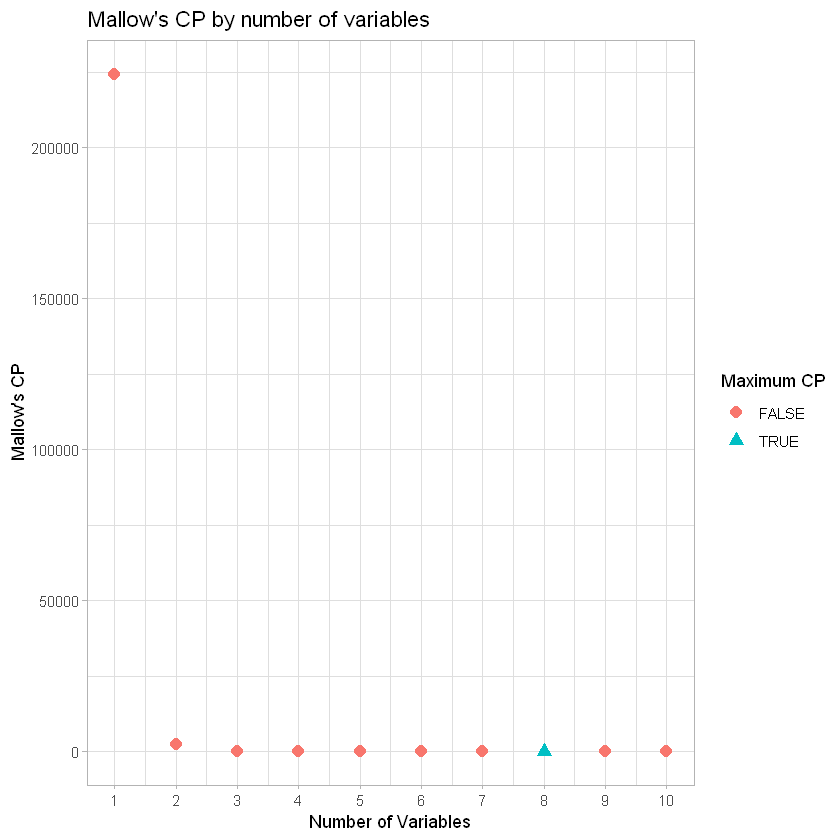

[1] -917.7613


[1] 3

(Intercept)           X          X2          X3 
   4.918052    7.079348   35.051626   11.990850

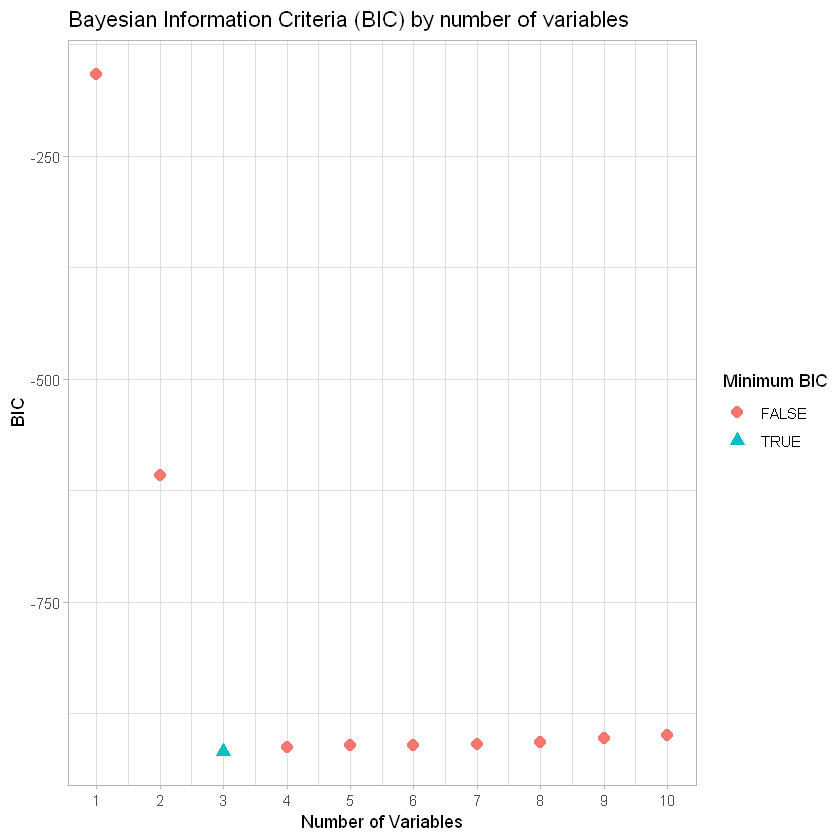

[1] 0.9999178


[1] 8

(Intercept)           X          X2          X3          X4          X5 
 4.81059699  6.26349140 35.89669812 13.83647702 -0.99689792 -0.94186226 
         X6          X7          X8 
 0.38613783  0.12933083 -0.04815804

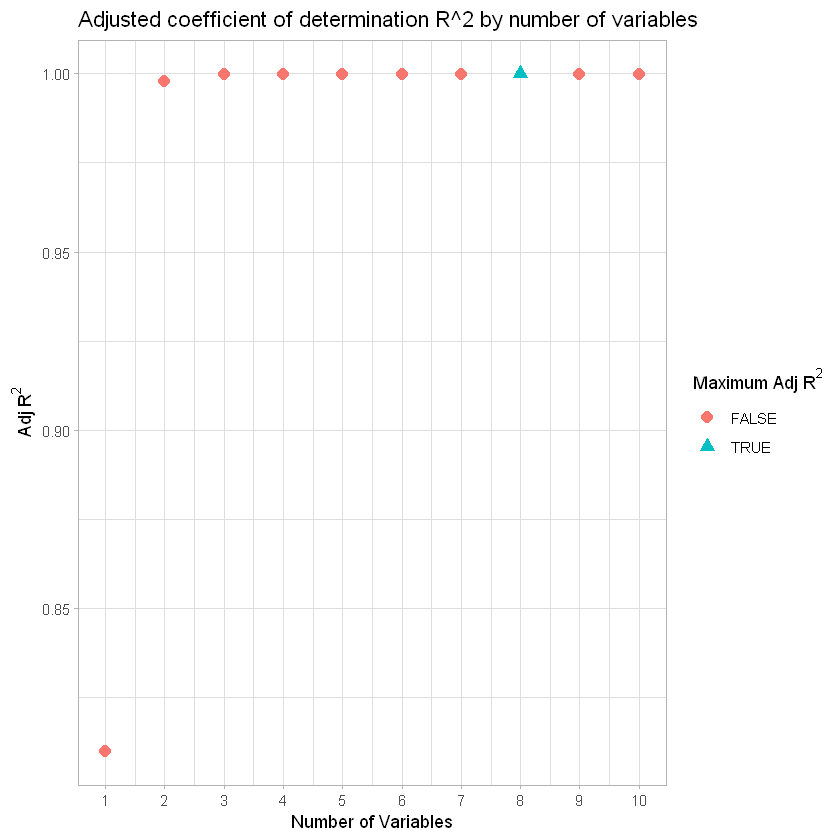

In [17]:
numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#mallow's cp
 cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
 cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
 ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
     geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", 
          shape="Maximum CP", title = "Mallow's CP by number of variables")

print(min(cp))
which.min(cp)
coef(regfit.full, which.min(cp))

# #bic
 bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
 bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
 ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
     geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) + 
     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", 
          shape="Minimum BIC", title = "Bayesian Information Criteria (BIC) by number of variables")


print(min(bic))
which.min(bic)
coef(regfit.full, which.min(bic))

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, 
         shape='Maximum Adj'~R^2, title = "Adjusted coefficient of determination R^2 by number of variables")

print(max(adjr2))
which.max(adjr2)
coef(regfit.full, which.max(adjr2))

> *Write your response here* 
> The Mallow's CP and adjusted R^2 models agree and indicate that for this data, a model including 8 terms would be ideal. and with BIC indicating that 3 terms would be ideal. But the overall performance or the elbows of the plots occur near 2-3 variables. 
>
> The coefficients used to model each ideal model are printed above each of the graphs above alongside their coefficient label. 
> e.g. for Adjr^2: 
> Terms: 8
>
>(Intercept)
    4.81059699438149
X
    6.26349139755578
X2
    35.8966981182912
X3
    13.8364770161365
X4
    -0.996897919585917
X5
    -0.941862263368749
X6
    0.386137830232056
X7
    0.129330834552517
X8
    -0.0481580443072431



---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10, method = c("forward"))
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " " " " " "*" " " " " " " " " " "
2  ( 1 )  " " "*" " " " " "*" " " " " " " " " " "
3  ( 1 )  " " "*" "*" " " "*" " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " "*" " " " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" " " " " " " " " "*"
6  ( 1 )  "*" "*" "*" " " "*" " " "*" " " " " "*"
7  ( 1 )  "*" "*" "*" " " "*" " " "*" "*" " " "*"
8  ( 1 )  "*" "*" "*" " " "*" "*" "*" "*" " " "*"
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "

[1] 8.453594


[1] 7

(Intercept)            X           X2           X3           X5           X7 
 4.931243936  6.407107883 35.020711830 13.515015609 -0.775747438  0.105619615 
          X8          X10 
 0.008991209 -0.002506122

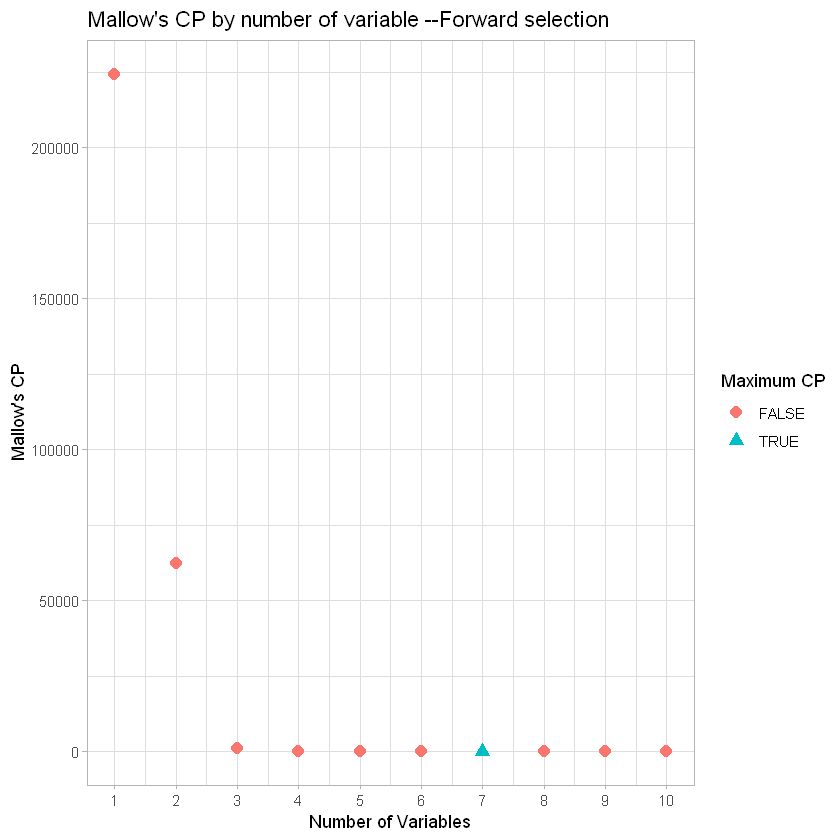

[1] -913.4116


[1] 4

(Intercept)            X           X2           X3           X5 
 4.933365025  7.175095099 35.033989274 11.919366496  0.009064144

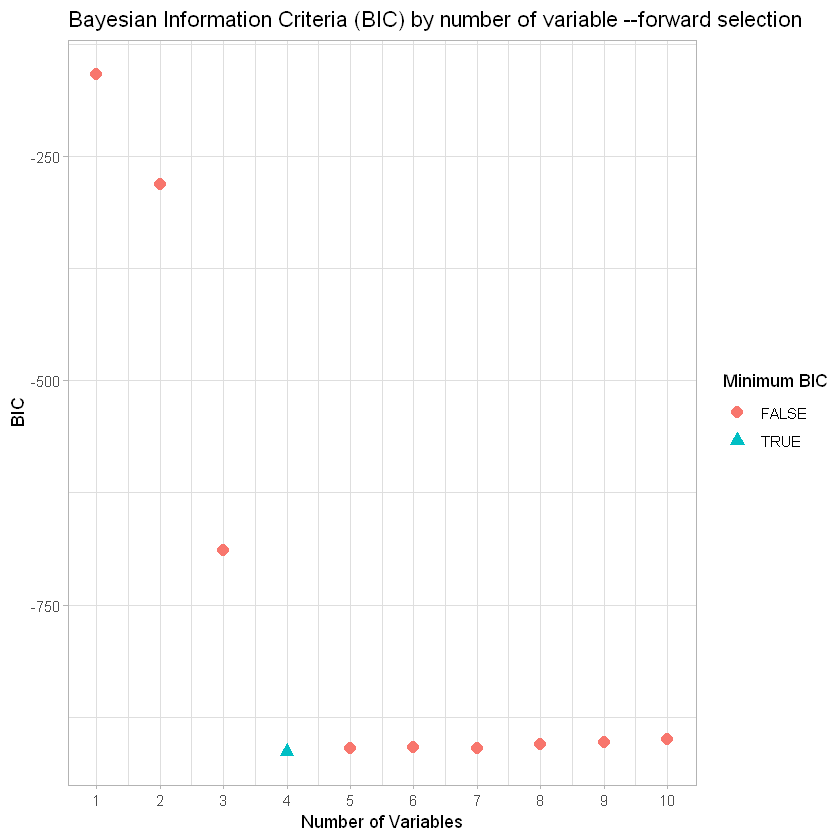

[1] 0.9999174


[1] 9

(Intercept)            X           X2           X3           X4           X5 
 4.744724744  6.238310054 36.451622795 13.923961005 -1.698718874 -1.000033127 
          X6           X7           X8          X10 
 0.682282512  0.139419723 -0.095812442  0.002386269

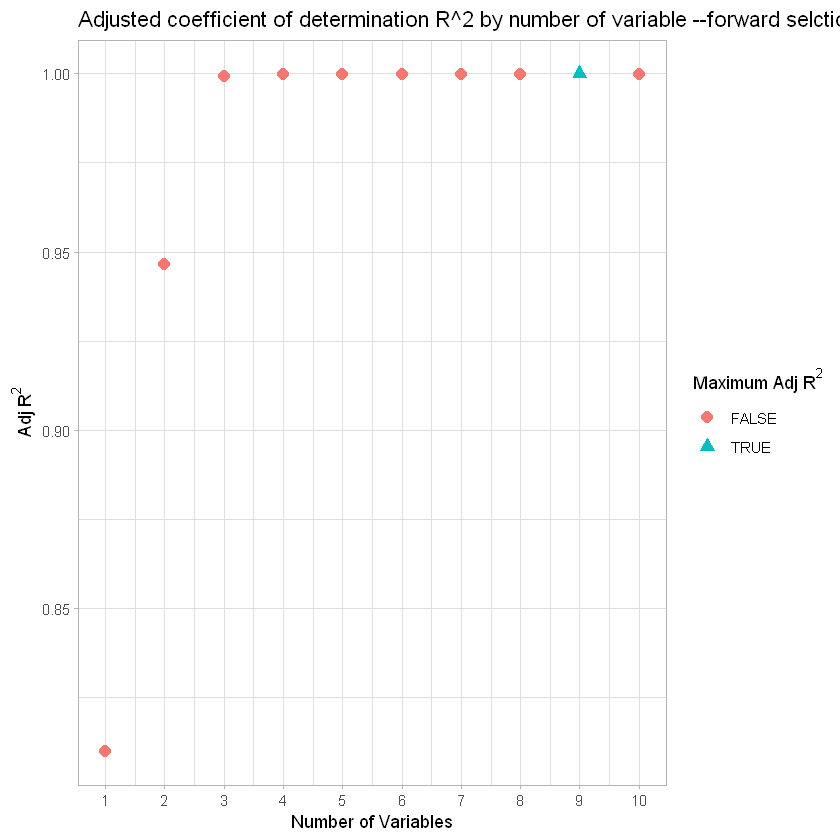

In [18]:
# https://www.rdocumentation.org/packages/leaps/versions/3.1/topics/regsubsets
# specify the method

#forward model 
regfit.forward <- regsubsets(Y ~ ., df, nvmax = 10, method = c("forward"))
reg.forward.summary <- summary(regfit.forward)
reg.forward.summary

##Malloy's cp
cp.df_forward <- data.frame(numvar = numvar, cp_forward <- reg.forward.summary$cp, 
                            mincp_forward <- allfalse)
cp.df_forward$mincp_forward[which.min(reg.forward.summary$cp)] <- TRUE
ggplot(cp.df_forward, aes(x=numvar, y=cp_forward, shape=mincp_forward, col=mincp_forward)) +
  geom_point(size=3) + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP",
       title = "Mallow's CP by number of variable --Forward selection") +
  theme_light()

print(min(cp_forward))
which.min(cp_forward)
coef(regfit.forward, which.min(cp_forward))

# BIC
bic.df_forward <- data.frame(numvar = numvar,bic_forward <- reg.forward.summary$bic, 
                             minbic_forward <- allfalse)
bic.df_forward$minbic_forward[which.min(reg.forward.summary$bic)] <- TRUE
ggplot(bic.df_forward,aes(x=numvar,y=bic_forward,shape=minbic_forward,col=minbic_forward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC",
       title = "Bayesian Information Criteria (BIC) by number of variable --forward selection")

print(min(bic_forward))
which.min(bic_forward)
coef(regfit.forward, which.min(bic_forward))


#adjr^2
adjr2.df_forward <- data.frame(numvar = numvar, adjr2_forward <- reg.forward.summary$adjr2, 
                               maxadjr2_forward <- allfalse)
adjr2.df_forward$maxadjr2_forward[which.max(reg.forward.summary$adjr2)] <- TRUE
ggplot(adjr2.df_forward,aes(x=numvar,y=adjr2_forward,shape=maxadjr2_forward,col=maxadjr2_forward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2,
       title = "Adjusted coefficient of determination R^2 by number of variable --forward selction")
print(max(adjr2_forward))
which.max(adjr2_forward)
coef(regfit.full, which.max(adjr2_forward))

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(Y ~ ., df, nvmax = 10, method = c("backward"))
10 Variables  (and intercept)
    Forced in Forced out
X       FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X   X2  X3  X4  X5  X6  X7  X8  X9  X10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " " " "*" " " " " " "
5  ( 1 )  "*" "*" "*" " " " " " " "*" "*" " " " "
6  ( 1 )  "*" "*" "*" " " " " "*" "*" "*" " " " "
7  ( 1 )  "*" "*" "*" " " "*" "*" "*" "*" " " " "
8  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*"

[1] 8.175201


[1] 8

(Intercept)           X          X2          X3          X4          X5 
 4.81059699  6.26349140 35.89669812 13.83647702 -0.99689792 -0.94186226 
         X6          X7          X8 
 0.38613783  0.12933083 -0.04815804

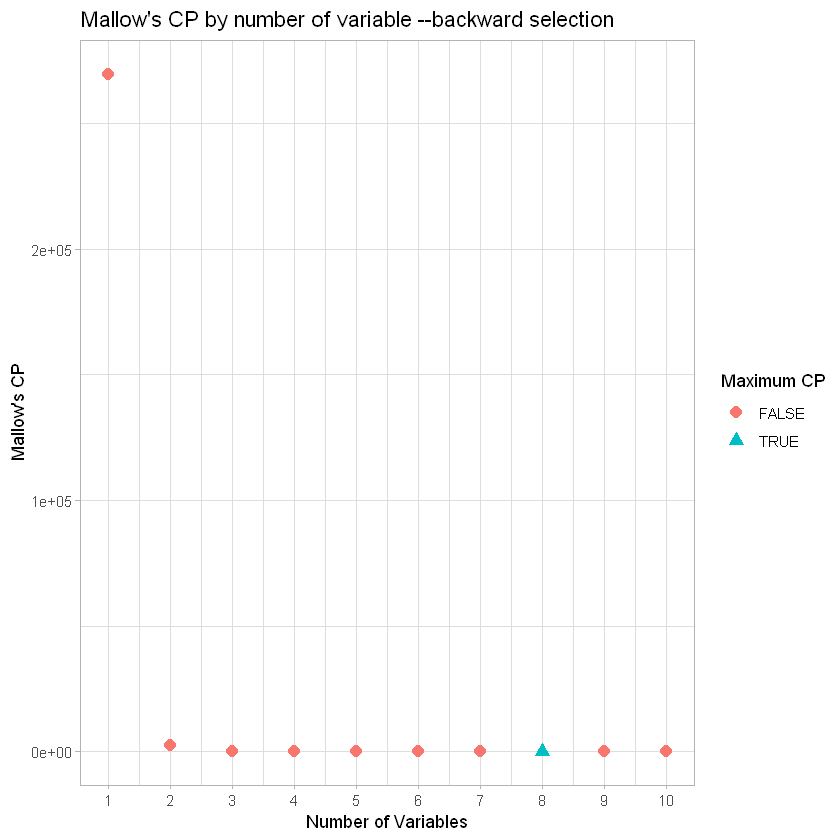

[1] -917.7613


[1] 3

(Intercept)           X          X2          X3 
   4.918052    7.079348   35.051626   11.990850

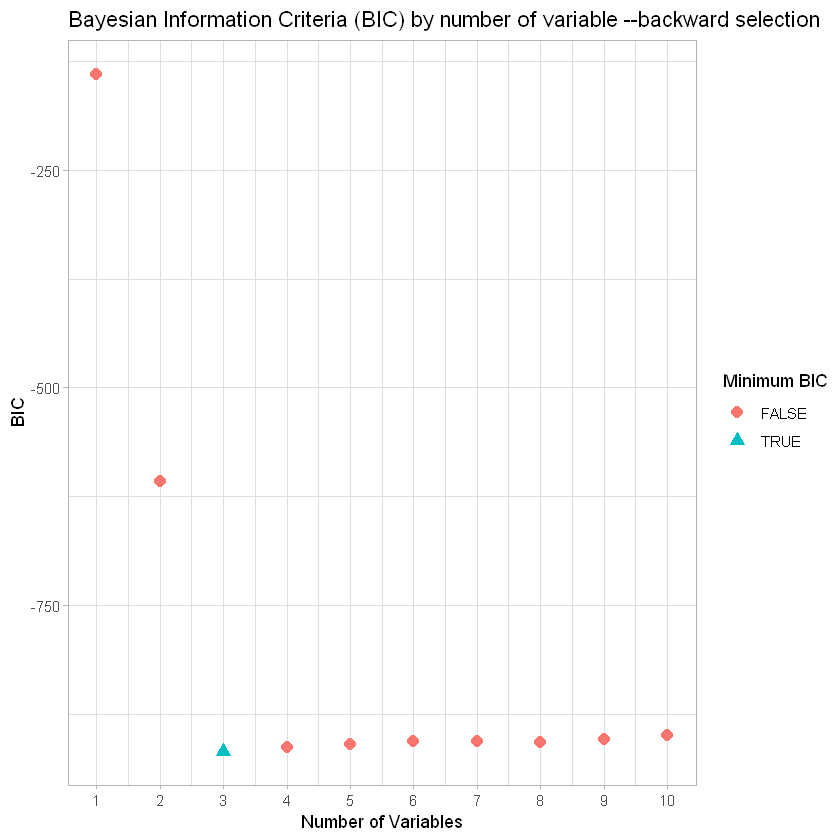

[1] 0.9999178


[1] 8

(Intercept)          x1          x5          x6         x11         x13 
  0.1118364   1.1174919   0.9937566   0.7738235   0.8840138   1.0413992 
        x15         x18         x19 
  1.1040040   0.8238875   0.5214646

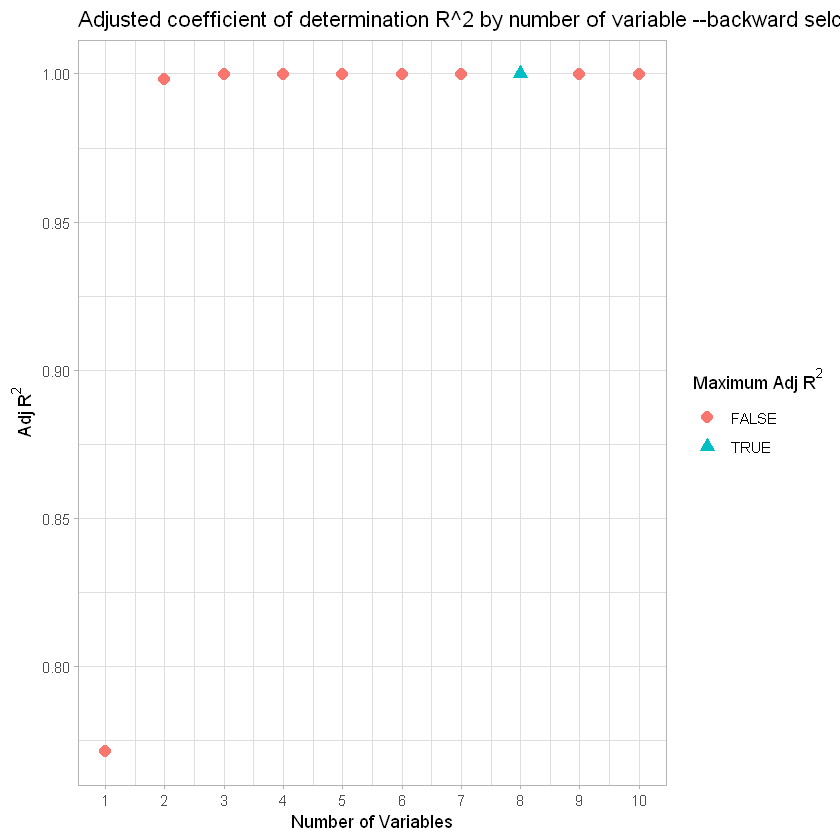

In [30]:
#backward model 
regfit.backward <- regsubsets(Y ~ ., df, nvmax = 10, method = c("backward"))
reg.backward.summary <- summary(regfit.backward)
reg.backward.summary

##Malloy's cp
cp.df_backward <- data.frame(numvar = numvar, cp_backward <- reg.backward.summary$cp, 
                            mincp_backward <- allfalse)
cp.df_backward$mincp_backward[which.min(reg.backward.summary$cp)] <- TRUE
ggplot(cp.df_backward, aes(x=numvar, y=cp_backward, shape=mincp_backward, col=mincp_backward)) +
  geom_point(size=3) + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP",
       title = "Mallow's CP by number of variable --backward selection") +
  theme_light()

print(min(cp_backward))
which.min(cp_backward)
coef(regfit.backward, which.min(cp_backward))

# BIC
bic.df_backward <- data.frame(numvar = numvar,bic_backward <- reg.backward.summary$bic, 
                             minbic_backward <- allfalse)
bic.df_backward$minbic_backward[which.min(reg.backward.summary$bic)] <- TRUE
ggplot(bic.df_backward,aes(x=numvar,y=bic_backward,shape=minbic_backward,col=minbic_backward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC",
       title = "Bayesian Information Criteria (BIC) by number of variable --backward selection")

print(min(bic_backward))
which.min(bic_backward)
coef(regfit.backward, which.min(bic_backward))
#adjr^2
adjr2.df_backward <- data.frame(numvar = numvar, adjr2_backward <- reg.backward.summary$adjr2, 
                               maxadjr2_backward <- allfalse)
adjr2.df_backward$maxadjr2_backward[which.max(reg.backward.summary$adjr2)] <- TRUE
ggplot(adjr2.df_backward,aes(x=numvar,y=adjr2_backward,shape=maxadjr2_backward,col=maxadjr2_backward)) + 
  geom_point(size=3) + theme_light() + scale_x_continuous(breaks=seq(0,10,1)) +
  labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2,
       title = "Adjusted coefficient of determination R^2 by number of variable --backward selction")
print(max(adjr2_backward))
which.max(adjr2_backward)
coef(regfit.full, which.max(adjr2_backward))

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.


> It appears that the default selection method as completed in the section 1 is identical to the findings when we selected the "backward" method. In the forward selection the number of coefficients were high (except for Malloy's CP, which was one variable lower). 
> The elbows of the plots for the first method and backwards were more similar, and slightly less well defined for the forward selection model. 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [32]:
set.seed(7)

df2 <- matrix(NA, nrow=1000, ncol=21) #create a matrix with NAs
eps2<- rnorm(1000) #epsilon error term 2

#create Beta coefficients
for (i in 2:21) {
  df2[,i] <- rnorm(1000)
}

beta = runif(20)
beta[sample(20, 5)] = 0
print("beta coefficients")
print(beta)

#create dataframe
for (i in 1:nrow(df2)) {
  df2[i,1] = (df2[i,2:21] %*% beta) + eps2[i]
}

df2 <- data.frame(df2)
colnames(df2) <- append("y", paste0("x", 1:20))


head(df2) #peep that df
print("full dataset")

## Create test train split
train <- sample(nrow(df2) * 0.1)
df2_train <- df2[train,]
df2_test <- df2[-train,]


head(df2_train)
print("train")

head(df2_test)
print("test")

[1] "beta coefficients"
 [1] 0.86420166 0.00000000 0.09335636 0.32652520 0.72983312 0.80275109
 [7] 0.00000000 0.00000000 0.00000000 0.62092316 0.96837967 0.54668101
[13] 0.89733037 0.23889128 0.81167402 0.00000000 0.24199947 0.85126591
[19] 0.52977882 0.08807213


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,⋯,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.1339373,1.2465863,1.4147485,1.2021348,-1.56881584,-0.4390559,-0.1222701,-0.2687101,-0.1318883,-1.2089157,⋯,-0.5585992,-0.0428876,-0.3828148,0.7168363,0.6985789,0.67903745,0.6341752,-1.5003570,-0.4595834,-0.2575906
2,0.6534708,-0.7655089,-2.1033311,-1.0626155,0.08521893,-0.4372183,-0.9501183,-0.6460667,0.7727997,0.9536174,⋯,1.1506234,0.9765331,1.0509019,-0.7675162,0.6099757,0.95489397,-1.6622791,2.0496175,0.1361250,0.2236826
3,2.7207819,0.2161769,-1.0836873,-0.6888250,2.15111380,-1.7827091,-0.2341507,-1.6595001,2.7400567,0.0949909,⋯,-0.9217053,1.5357973,1.5247192,0.9915014,0.8615012,1.14978343,0.7258745,1.3276711,1.1870402,1.0458008
4,-1.4850483,-0.3643673,-0.3703383,-1.8573875,0.31335709,0.1498823,-0.4779484,0.5584125,1.3123117,-2.1152477,⋯,-0.8473124,0.4569601,-0.3524163,-0.1967865,0.2221628,-0.04644167,-1.0784992,-0.2297948,-0.1034430,1.0201045
5,-0.2808796,-0.8206727,0.7557620,2.1881843,0.06584053,-0.5459620,-0.3581681,0.9596813,-0.4886679,-0.4192946,⋯,-0.3359664,0.7856112,1.8792661,-1.6211312,-0.1221005,-0.77299592,-0.7388894,0.1049551,2.2571479,-0.1006152
6,4.5277225,0.5823607,0.1780450,0.2684239,1.70352505,0.8114545,1.1764904,-0.4212632,0.4322041,0.1129376,⋯,0.3657479,1.1723508,0.6383581,-0.8390841,0.3117004,0.11136202,-0.5464460,1.3380008,1.1145063,-1.8949970


[1] "full dataset"


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,⋯,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,4.5277225,0.5823607,0.1780450,0.26842386,1.7035250,0.81145453,1.1764904,-0.4212632,0.43220409,0.11293763,⋯,0.3657479,1.1723508,0.63835809,-0.8390841,0.3117004,0.11136202,-0.5464460,1.3380008,1.11450630,-1.89499697
63,-0.5375611,0.3735465,0.3390785,0.25587916,-0.4821487,1.23645129,1.0625994,-1.1800987,0.67754117,-0.11660548,⋯,0.2808138,-0.9146055,-0.58205993,0.0217115,-2.9313034,2.13595197,0.9972629,0.8088749,-0.60973952,-0.42543406
29,1.0703139,1.4557338,-0.1861957,-0.32941559,-1.3217254,1.23781359,0.8990695,-0.7401299,-1.39070553,0.33666754,⋯,-1.1111813,1.3496289,-0.05243495,0.4654092,-2.0452797,-0.06907754,-0.7400608,1.6524589,-0.44913746,-0.06905433
48,2.2136558,0.7529639,0.8419220,0.17198235,0.3455190,-0.06984991,0.7852429,-1.5718503,1.12175608,0.30370550,⋯,0.8680369,-1.1916297,-1.48170625,0.2931556,0.4453774,1.10967789,1.2548455,0.2833390,1.54709115,0.12569081
97,4.8711200,3.1393687,-2.9012023,0.08983045,-0.3299558,0.35907920,1.5070989,1.1039885,-3.93090169,1.63684322,⋯,1.6157389,-0.1539488,-0.38585704,-0.5403739,1.0597098,0.11073743,-0.7285586,-1.4360005,-0.05868554,-1.30818578
70,0.9458724,-0.7922808,-1.9628694,0.88566860,0.5258215,-0.03735233,0.4702701,-0.1404534,0.04819022,0.08298163,⋯,-0.9075759,-0.4521809,-0.53559868,-1.1724853,0.9718999,1.14280278,-0.4471806,1.1603132,-0.58085458,-0.47301214


[1] "train"


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,⋯,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,0.8071753,2.1641666,0.5923079,1.1040496,-0.48026086,-1.8955933,0.781023686,-0.7776559,-1.10207110,2.65349395,⋯,-1.7886662,-1.0804553,-0.2930243,0.17351842,-0.3064487,-0.21936260,-0.73815246,1.44347498,0.67371749,1.7717413
102,2.7562188,2.4209916,-0.8093397,-1.5372891,-0.10630519,-0.4363213,0.787701331,-0.6389117,-0.55907413,2.09111397,⋯,0.3407137,1.8023137,-0.8910892,2.45420050,-0.3715867,0.26669186,0.67063714,-0.34602170,-0.01211526,-0.2644567
103,2.0604356,2.2109649,0.8495062,0.0165824,-0.20059450,-1.2630568,-0.355308829,-1.1225987,-0.17708851,-1.37809071,⋯,1.1570288,-0.3335782,-0.6453255,0.69812125,0.5872984,0.83710909,-1.92838968,-0.45463000,2.10121360,-0.6133898
104,-4.9342978,0.9116650,-0.1923357,-0.1333743,-0.39465860,-0.9185951,-0.952062444,1.0411603,-1.09670639,0.22833049,⋯,-0.2281841,-1.8294743,-0.6488586,-1.69889120,-1.1250427,-1.85884539,0.52739914,0.53813539,-0.48125009,-0.7055567
105,1.1783511,0.8978615,1.1037698,0.5698524,0.21568613,-1.9583253,-0.113183651,-0.6111422,-1.31354102,-1.89935690,⋯,0.6631126,2.5284852,0.2820812,0.06045005,0.1575016,-0.08600852,0.01331849,-0.02603377,-0.01077810,2.1851161
106,-6.8348740,-0.7193885,-0.7193825,1.1361199,-0.09743793,-1.1215700,-0.003006725,0.1112571,-0.01536906,0.09054127,⋯,-1.2019629,0.1879677,0.5098609,0.90162621,-0.6763861,1.37895743,-0.67202845,-2.18732890,-0.66608494,0.3323794


[1] "test"


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
Call: regsubsets.formula(y ~ ., df2_train, nvmax = 20)
20 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 )  " " " " " " " " " " " " " " " " " " " " " " " " " " " " "*" " " " "
2  ( 1 )  " " " " " " " " "*" " " " " " " " " " " " " " " " " " " "*" " " " "
3  ( 1 )  "*" " " " " " " "*" " " " " " " " " " " " " " " " " " " "*

(Intercept)          x1          x2          x3          x4          x5 
 0.29081201  1.01264805  0.01971645  0.09928467  0.43884096  0.84629156 
         x6          x7          x8          x9         x10         x11 
 0.96577718  0.01331592 -0.10515270 -0.03937084  0.58971080  0.96638463 
        x12         x13         x14         x15         x16         x17 
 0.52096672  0.95174582  0.39375664  0.99052263  0.06275071  0.43110391 
        x18         x19         x20 
 0.71683658  0.51769531  0.07228924 


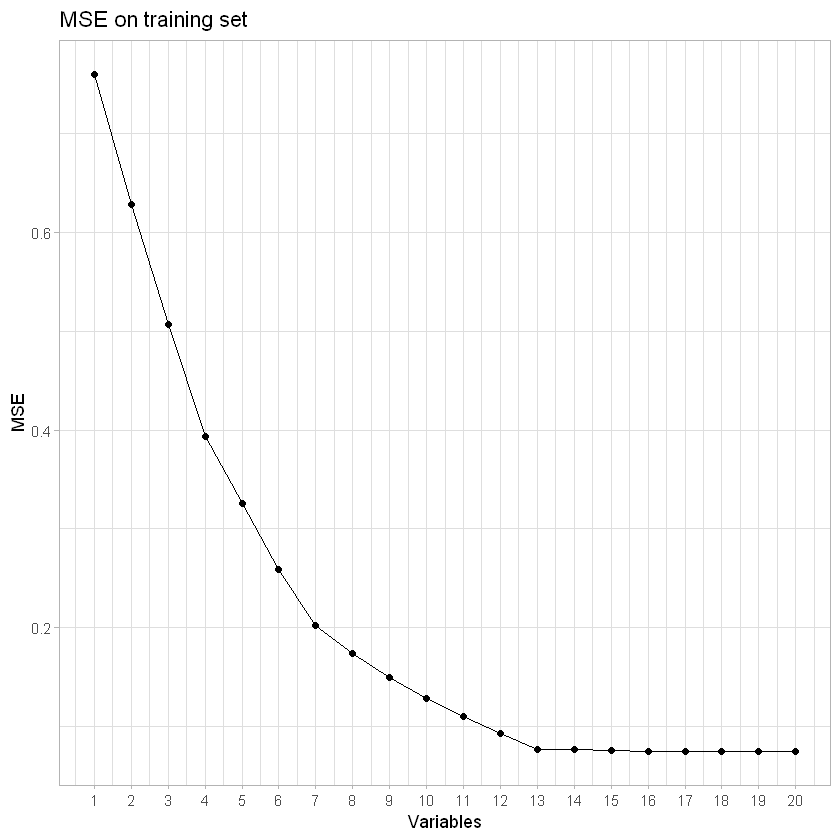

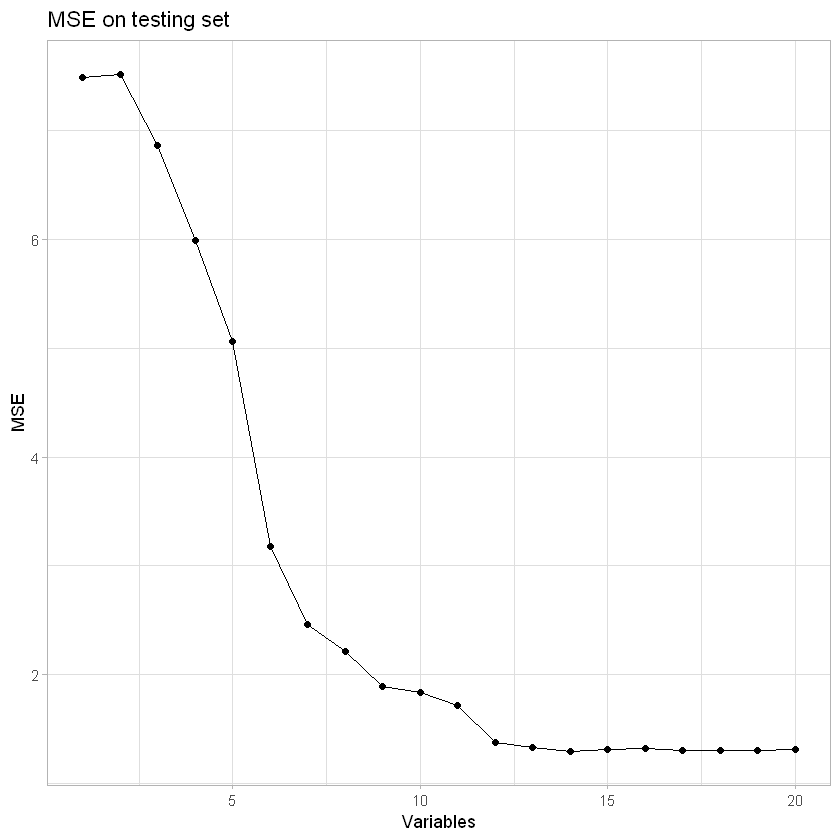

In [28]:
## Perform best subset selection on the training set
regfit.full <- regsubsets(y ~ ., df2_train, nvmax = 20)
bestsubset_summary <- summary(regfit.full)
bestsubset_summary


## Plot associated training set MSE for best model of each size
tibble(MSE = bestsubset_summary$rss/900) %>%
  mutate(id = row_number()) %>%
  ggplot(aes(id, MSE)) + 
  geom_line() + geom_point() + 
  xlab('Variables') + 
  ggtitle('MSE on training set') + 
  scale_x_continuous(breaks = 1:20) + theme_light()


## Plot associated test set MSE for best model of each size
test_errors = rep(NA, 19)
test.matrix <- model.matrix(y ~ ., data = df2_test)

for (i in 1:20) {
  coeffs = coef(regfit.full, id = i)
  pred = test.matrix[,names(coeffs)]%*%coeffs
  test_errors[i] = mean((df2_test$y-pred)^2)
}

print(coeffs)

tibble(MSE = test_errors) %>%
  mutate(id = row_number()) %>%
  ggplot(aes(id, MSE)) + 
  geom_line() + geom_point() + 
  xlab("Variables") + 
  ggtitle("MSE on testing set") + theme_light()



c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [29]:
which.min(test_errors)
coef(regfit.full, which.min(test_errors))

[1] 14

(Intercept)          x1          x3          x4          x5          x6 
 0.28852034  1.02614887  0.09607134  0.41653777  0.83819411  0.96212312 
        x10         x11         x12         x13         x14         x15 
 0.61697519  0.97149098  0.50532550  0.92725333  0.42354763  0.97701766 
        x17         x18         x19 
 0.43858193  0.72625716  0.52312179

> It looks like the MSE stabilizes arounnd 12-13 terms for both the training and test set. 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Emily Goldberg, queen of R and someone who really deserves ice cream :) 